## Unit 6: The two types of erors in a formal hypothesis test using p-values

The formal t-test can guide in our decision if differences between the mean of two independent data sample sets are worth to report or worth to further explore for a physically based explanation. 
However, it is worth to look at the four possible outcomes of our decision, given that we do not know the true situation we are in. Are the differences real, or are the differences just a random result while the true means are the same?

It is also worth pointing out that the test and and the choice of the significance level (usually called alpha value and set to 5% or 1%) are purely based on statistical reasoning, initially. When the two types of errors in our decision have real risks involved (e.g. to health, proper, legal liability) it is important that we interpret our formal t-test result in the framework of risk assessments, too.

This notebook example is just serving as an illustration of what we mean by the _error type one_ and _error type two_, and the associated risks. 

Imagine you want to develop an image-based test for distinguishing consumable mushrooms from poisonous mushrooms, which look very similar. The green content in the images (taken under same light conditions with same camera settings) can serve as a metric to distinguish the mushrooms.

In [16]:
import matplotlib.pyplot as plt
import numpy as np

file1a="mushroom_sample1.ppm" #Hypholoma fasciculare (poisonous)
file1b="mushroom_sample_unknown.ppm" # is also Hypholoma fasciculare (poisonous)
file2="mushroom_sample2.ppm" #Hypholoma capnoide
file_poisonous=file1a
file_healthy=file2
def read_ppm(filename,path='../data/'):
    
    with open(path+filename) as f:
        f.readline()
        f.readline()
        line=f.readline()
        values=line.split()
        dim=np.array([int(values[0]),int(values[1])])
        nline=3*dim[0]*dim[1]
        i=0
        allowed_range=[0,255]
        fill_value=255
        rgb=np.empty(3*dim[0]*dim[1])
        while i<nline:
            line=f.readline()
            rgb[i]=int(line)
            i=i+1
        rgb=np.reshape(rgb,newshape=[dim[1],dim[0],3])
    return rgb
img_p=read_ppm(file_poisonous)
img_h=read_ppm(file_healthy)
RED=0
GREEN=1
BLUE=2
COLOR=GREEN



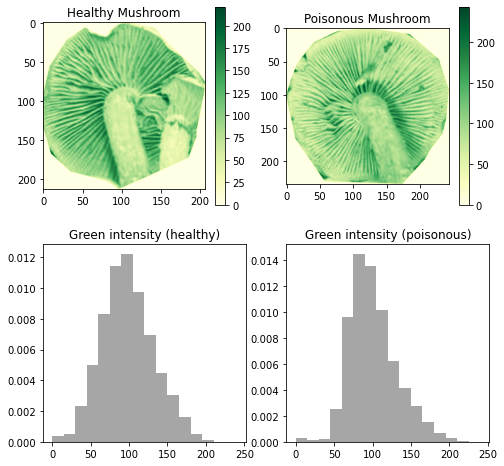

In [28]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
# upper left image: Healthy Mushroom
cs_p=ax[0,0].imshow(255-img_h[:,:,COLOR],cmap=plt.cm.YlGn)
# upper right image: Poisonous Mushroom
cs_h=ax[0,1].imshow(255-img_p[:,:,COLOR],cmap=plt.cm.YlGn)
ax[0,0].set_title('Healthy Mushroom')
ax[0,1].set_title('Poisonous Mushroom')
plt.colorbar(cs_p,ax=ax[0,0])
plt.colorbar(cs_h,ax=ax[0,1])

# Histograms below

# make highest values (in image the whitest part) into lowest values
# so that the more green in the mushroom color the larger the value
green_h=255-np.reshape(img_h[:,:,COLOR],newshape=np.size(img_h[:,:,COLOR]))
isuse_h=green_h>0
green_p=255-np.reshape(img_p[:,:,COLOR],newshape=np.size(img_p[:,:,COLOR]))
isuse_p=green_p>0
bins=np.arange(0,255,15)
ax[1,0].hist(green_h[isuse_h],bins=bins,alpha=0.7,color='gray',density=True)

ax[1,1].hist(green_p[isuse_p],bins=bins,alpha=0.7,color='gray',density=True)

ax[1,0].set_title('Green intensity (healthy)')
ax[1,1].set_title('Green intensity (poisonous)')

plt.show()


In [29]:


from scipy.stats import ttest_ind

tval,pval=ttest_ind(green1[isuse1],green2[isuse2],equal_var=False)
m1=np.mean(green1[isuse1])
m2=np.mean(green2[isuse2])
s1=np.std(green1[isuse1])
s2=np.std(green2[isuse2])
d=m1-m2
print ("mean and stddev 1: ",m1,s1)
print ("mean and stddev 2: ",m2,s2)
print ("difference: ",d)
print (tval,pval)

mean and stddev 1:  98.38683955068645 30.556098192434785
mean and stddev 2:  97.90641341588027 33.820418655294404
difference:  0.48042613480618
1.5259624231077458 0.12702972274904178


In [5]:
ttest_ind(green1,green2,equal_var='False')
#not significantly different

Ttest_indResult(statistic=1.001624853784532, pvalue=0.31652864873274467)